In [ ]:
#load the pos/neg/fp from pipeline tests into their own list of arrays 
import os
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale



NEG_PATH = "combined_neg_h2_2/"
POS_PATH = "merged_h2/"
FP_PATH = "/home/toyonaga/projects/def-sfabbro/toyonaga/HSTLens/CC_batch_processing/false_positives/"
 #includes both pos and neg samples



#load the negatives into even numbered indices (including 0)
count =0
set_size =4000
nx=np.ones((set_size, 1, 100, 100))
ny=np.ones((set_size,1))
bad_images = []
for filename in os.listdir(NEG_PATH):
    if filename.endswith(".fits") and count<set_size: 
        pic = fits.open(NEG_PATH+filename)[0].data

        if np.isnan(pic).all() ==True:
            bad_images.append(count)
            continue
            
        nx[count] = np.nan_to_num(pic)
        ny[count] =(np.array([0]))
        print("1 "+str(count))
        count+=1

nx = np.delete(nx,bad_images, axis=0)        
ny = np.delete(ny,bad_images, axis=0) 
print(nx.shape)
    
    
#load the positives into odd numered indices
set_size =4000
px=np.ones((set_size, 1, 100, 100))
py=np.ones((set_size,1))
count =0
bad_images = []
for filename in os.listdir(POS_PATH):
    if filename.endswith(".fits") and count<set_size: 
        pic = fits.open(POS_PATH+filename)[0].data
        
        if np.isnan(pic).all() ==True:
            bad_images.append(count)
            continue
            
        px[count]=np.nan_to_num(pic)
        py[count]=np.array([1])
        print("2 "+str(count))
        count+=1

px = np.delete(px,bad_images, axis=0)        
py = np.delete(py,bad_images, axis=0) 
print(px.shape)



In [3]:
#import from .npy bin file

import numpy as np
px = np.load("/home/toyonaga/scratch/positive_array.npy")
bad_images=[]
for i in range(len(px)):
    px[i][0] = np.nan_to_num(px[i][0])
    #print(i)
    if px[i][0].all==0:
        bad_images.append(i)
print('done parsing')
px = np.delete(px,bad_images, axis=0)
py = np.ones((px.shape[0],1))

nx = np.load("/home/toyonaga/scratch/negative_array.npy")
bad_images=[]
for i in range(len(nx)):
    nx[i][0] = np.nan_to_num(nx[i][0])
    #print(i)
    if nx[i][0].all==0:
        bad_images.append(i)
print('done parsing')
nx = np.delete(nx,bad_images, axis=0)
ny = np.zeros((nx.shape[0],1))


done parsing
done parsing


[1.]


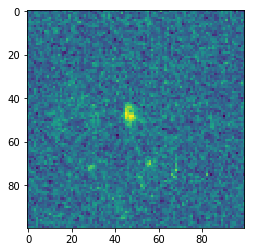

KeyboardInterrupt: 

In [4]:
 #quickly view some images
import matplotlib.pyplot as plt


from IPython import display

import os

print(len(x_combined_shuf))
sp=int(input("start position"))
for i in range(len(x_combined_shuf)):
    exit=False
    display.clear_output(wait=True)
    plt.imshow(x_combined_shuf[i+sp][0]) 
    print(y_combined_shuf[i+sp])
    plt.pause(0.01)
    while(1):
        
        ans = input("curr num "+str(i+sp)+"next=1, exit=0")
        plt.show()
        break
        if ans ==1:
            break
        if ans==0:
            exit=True
            break
    if exit==True:
        break

In [4]:
#randomize and shuffle and combine neg and pos
import random
#first shuffle the large set of simulated data and the real data because we are not using all of it
'''
s1 = np.arange(ims.shape[0])
np.random.shuffle(s1)
ims_shuf = ims[s1]
y_shuf = y[s1]
'''
#combine part of the shuffled simulated and real data
x_combined = np.concatenate((px[:int(len(px)*0.8)],nx[:int(len(nx)*0.8)], fpx[:int(len(fpx)*0.8)] ))
y_combined = np.concatenate((py[:int(len(py)*0.8)],ny[:int(len(ny)*0.8)], fpy[:int(len(fpy)*0.8)] ))

print('concat')

#shuffle the combined array
s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)

x_combined_shuf =x_combined[s3]
y_combined_shuf = y_combined[s3]

NameError: name 'fpx' is not defined

In [4]:
#randomize and shuffle and combine neg and pos
import random

x_combined = np.concatenate((px,nx ))
y_combined = np.concatenate((py,ny))

print('concat')

#shuffle the combined array
s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)

x_combined_shuf =x_combined[s3]
y_combined_shuf = y_combined[s3]

# tr_x = x_combined_shuf[:len(x_combined_shuf)*0.8]
# tr_y = y_combined_shuf[:len(y_combined_shuf)*0.8]
# test_x = x_combined_shuf[len(x_combined_shuf)*0.8:]
# test_y = y_combined_shuf[len(y_combined_shuf)*0.8:]

concat


In [7]:
import tensorflow
import keras
from keras.layers import Activation
from keras.layers import Conv2D, ELU
from HSTLens_resnet2 import deeplens_classifier


my_model = deeplens_classifier(n_epochs=7)
my_model._build() 

my_model._fit(x_combined_shuf[:55000],y_combined_shuf[:55000])

#my_model.model.save("real_lenses_weights") # issue with json serializing
my_model.model.save_weights("combined_nonsubtracted_weights_resnet2_h2_55000")
#my_model.model.load_weights("test real lens weights")


building resnet10_CC
(?, 1, 100, 100)
pre- resnet block entered!
relu 2 conv, 
kernel= 3
shorcut (?, 32, 50, 50) net (?, 32, 50, 50)
pre- resnet block entered!
relu 2 conv, 
kernel= 3
shorcut (?, 64, 25, 25) net (?, 64, 25, 25)
pre- resnet block entered!
relu 2 conv, 
kernel= 3
shorcut (?, 128, 12, 12) net (?, 128, 12, 12)
...Fitting model ...
Train on 44000 samples, validate on 11000 samples
Epoch 1/7
step decay entered. Learning rate: 0.001
44000/44000 [==============================] - 39s 886us/step - loss: 0.3544 - acc: 0.8302 - val_loss: 0.1915 - val_acc: 0.9185
Epoch 2/7
step decay entered. Learning rate: 0.001
44000/44000 [==============================] - 37s 837us/step - loss: 0.1815 - acc: 0.9250 - val_loss: 0.1650 - val_acc: 0.9307
Epoch 3/7
step decay entered. Learning rate: 0.001
44000/44000 [==============================] - 37s 839us/step - loss: 0.1363 - acc: 0.9464 - val_loss: 0.1209 - val_acc: 0.9555
Epoch 4/7
step decay entered. Learning rate: 0.001
44000/44000 [===

In [7]:
(my_model.batch_history.epoch_losses) 

[0.745, 0.76, 0.75, 0.82, 0.86, 0.855, 0.825, 0.875, 0.875, 0.9]

auc 0.9948851975782793


/project/6016730/mlhaa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


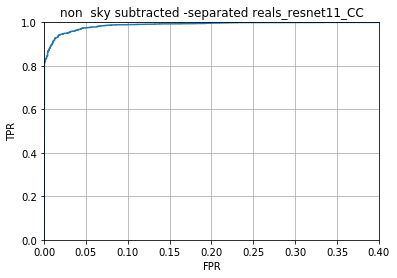

In [8]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# x_combined_roc = np.concatenate((ims_shuf[10000:], ims_real_test))
# y_combined_roc = np.concatenate((y_shuf[10000:], y_real_test))
fpr, tpr, t=my_model.eval_ROC(x_combined_shuf[55000:],y_combined_shuf[55000:])
print("auc "+str( metrics.auc(fpr, tpr)))

plt.title('non  sky subtracted -separated reals_resnet11_CC')
plt.plot(fpr,tpr)
plt.xlabel('FPR'); 
plt.ylabel('TPR')
plt.xlim(0,0.4); 
plt.ylim(0,1)
plt.grid('on')

/project/6016730/mlhaa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


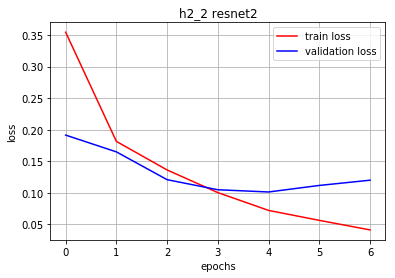

In [9]:
#my_model.model.history is a callback obj my_model.model.history is a dict
train_loss = my_model.model.history.history['loss'] 
val_loss = my_model.model.history.history['val_loss']
xc = range(7)

plt.figure()
plt.title('h2_2 resnet2')
plt.xlabel('epochs');
plt.ylabel('loss')
plt.plot(xc, train_loss,'r-',label="train loss")
plt.plot(xc, val_loss, 'b-',label="validation loss")
plt.grid('on')
plt.legend()

In [671]:
start = time.time()
predictions= my_model._predict(x[:1000],y[:1000])
duration = time.time()-start
print(duration)

''' 
12.427s for 100 predictions
1.28s for 10 predicitons
97.0560390949 for 1000 predictions 
'''

NameError: name 'x' is not defined

/project/6016730/mlhaa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


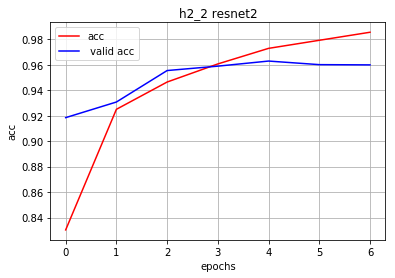

In [11]:
acc = my_model.model.history.history['acc'] 
val_acc = my_model.model.history.history['val_acc'] 
xc =range(7)
plt.figure()
plt.title('h2_2 resnet2')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(xc, acc,'r-',label="acc")
plt.plot(xc, val_acc,'b-',label=" valid acc")
plt.grid('on')
plt.legend()

In [674]:
x_test = np.load('pos_real_nonskysubtracted_x1.npy')
y_test = np.load('pos_real_nonskysubtracted_y1.npy')
x_test.shape

(420, 1, 100, 100)

(1200, 1, 100, 100)
[1.]


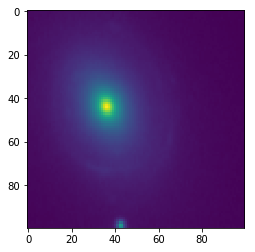

In [53]:
i = 1183

print( ims_real_test.shape)
plt.imshow(ims_real_test[i][0])
print(y_real_test[i])

In [13]:
#load the real TEST images and their negatives
import os
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale
from random import shuffle

NEG_PATH = "/home/toyonaga/scratch/augmented_reals_3/dim_negs_norm_aug_noskysubtract/"
#POS_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/non-neg-set/merged/"
POS_PATH = "/home/toyonaga/scratch/augmented_reals_3/augmented_reals_separate_test/"
set_size =15*40*2  #includes both pos and neg samples

ims_real_test = np.ones((set_size, 1, 100, 100))
y_real_test = np.ones((set_size,1))

c_sig=10

#load the negatives into even numbered indices (including 0)
count =0
neg_list = os.listdir(NEG_PATH)
shuffle(neg_list)
for filename in neg_list:
    if filename.endswith(".fits") and count<set_size/2: 
        pic = fits.open(NEG_PATH+filename)[0].data
    
            
        c = np.nan_to_num(pic)
        sky_c =3.*np.median(pic)- 2.*np.mean(pic) #calc sky
        sigma_c= np.std(c)          #calc sigma
        c[np.isnan(c)]=sky_c          #get rid of NAn
        c[c>(sky_c+c_sig*sigma_c)]=sky_c+c_sig*sigma_c    #clip values
        c= c-sky_c                                         #subtract sky
        tmp_lens2 = c.reshape(-1,)                        #scale 

        tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
        pic = tmp_lens2.reshape(pic.shape[2],pic.shape[2])


        summed=pic
        np.random.seed()
        h1 = (sky_c)*np.random.randn(10000)
        np.random.shuffle(h1)
        summed = np.add(summed,h1.reshape(100,100)) # you can add constants too
        tmp_image = summed.reshape(-1,)
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
        ims_real_test[count*2] = summed
        y_real_test[count*2] = np.array([0])
        count+=1
    
    
#load the positives into odd numered indices
count =0
pos_list = os.listdir(POS_PATH)
shuffle(pos_list)
for filename in pos_list:
    if filename.endswith(".fits") and count<set_size/2: 
        pic = fits.open(POS_PATH+filename)[0].data
        
          
        c = np.nan_to_num(pic)
        sky_c =3.*np.median(pic)- 2.*np.mean(pic) #calc sky
        sigma_c= np.std(c)          #calc sigma
        c[np.isnan(c)]=sky_c          #get rid of NAn
        c[c>(sky_c+c_sig*sigma_c)]=sky_c+c_sig*sigma_c    #clip values
        c= c-sky_c                                         #subtract sky
        tmp_lens2 = c.reshape(-1,)                        #scale 

        tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
        pic = tmp_lens2.reshape(pic.shape[2],pic.shape[2])


        summed=pic
        np.random.seed()
        h1 = (sky_c)*np.random.randn(10000)
        np.random.shuffle(h1)
        summed = np.add(summed,h1.reshape(100,100)) # you can add constants too
        tmp_image = summed.reshape(-1,)
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
        ims_real_test[count*2+1] = summed
        y_real_test[count*2+1] = np.array([1])
        count+=1
        

          

In [14]:
predictions  = my_model._predict( ims_real_test, y= None, discrete = True)
tp =0.
fp =0.
fn=0.
pos =0.
for i in range(len(predictions)):
    if (predictions[i] ==1) and( y_real_test[i] ==1):
        tp+=1
        pos+=1
        
    if (predictions[i] == 1) and (y_real_test[i]==0): 
        fp+=1
        #print ("fp"+ str(i))
    if (predictions[i] == 0 ) and (y_real_test[i] ==1):
        fn+=1
        pos+=1
        #print( "fn"+ str(i))
        
print ("fpr: ", fp/pos,"tpr: ", tp/pos ,"fp ",fp, "tp ",  tp,"fn ", fn)


...Generating Predictions ...
fpr:  0.38333333333333336 tpr:  0.4683333333333333 fp  230.0 tp  281.0 fn  319.0


In [15]:
pur, comp = my_model.eval_purity_completeness(ims_shuf[10000:], y_shuf[10000:])
#pur, comp = my_model.eval_purity_completeness(ims_real_test,y_real_test)
"purity" + str(pur),"comp" + str(comp)

NameError: name 'ims_shuf' is not defined

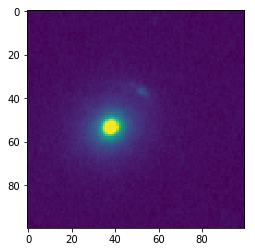

In [23]:
plt.imshow(ims_real_test[7][0])